In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

IMDb dataset

In [2]:
max_features = 10000
max_len = 100

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [5]:
print(f"Training data shape: {x_train.shape}, Test data shape: {x_test.shape}")

Training data shape: (25000, 100), Test data shape: (25000, 100)


In [6]:
model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\satis\OneDrive\Desktop\60_Days_ML_Challenge\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 98s 239ms/step - accuracy: 0.7146 - loss: 0.5391 - val_accuracy: 0.8343 - val_loss: 0.3860
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 89s 228ms/step - accuracy: 0.8695 - loss: 0.3214 - val_accuracy: 0.8461 - val_loss: 0.3593
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 210ms/step - accuracy: 0.8983 - loss: 0.2556 - val_accuracy: 0.8262 - val_loss: 0.3886
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 267ms/step - accuracy: 0.9225 - loss: 0.2057 - val_accuracy: 0.8417 - val_loss: 0.4085
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 350ms/step - accuracy: 0.9417 - loss: 0.1578 - val_accuracy: 0.8384 - val_loss: 0.4566


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.8378 - loss: 0.4599

Test Accuracy: 0.8384


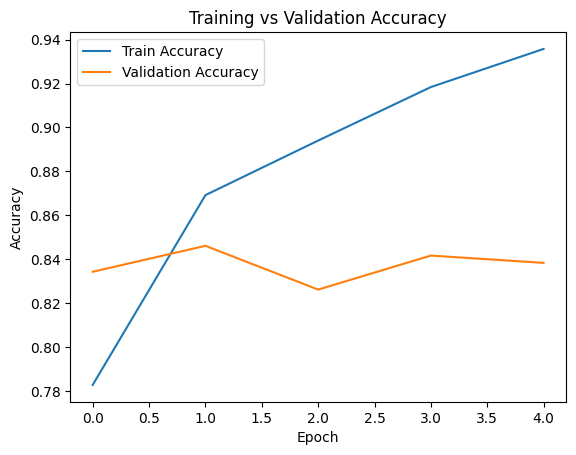

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
predictions = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step


In [13]:

for i in range(5):
    review = " ".join([str(word) for word in x_test[i]])
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Review: {review[:100]}...")
    print(f"Prediction: {sentiment}\n")

Review: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 591 202 14 31 6 717 10 10 2 2 5 4 ...
Prediction: Negative

Review: 6 976 2078 7 5293 861 2 5 4182 30 3127 2 56 4 841 5 990 692 8 4 1669 398 229 10 10 13 2822 670 5304 ...
Prediction: Positive

Review: 4 5673 7 15 2 9252 3286 325 12 62 30 776 8 67 14 17 6 2 44 148 687 2 203 42 203 24 28 69 2 6676 11 3...
Prediction: Positive

Review: 4 452 11 14 20 9 8654 19 41 476 8 4 213 7 9185 13 657 13 286 38 1612 44 41 5 41 1729 88 13 62 28 900...
Prediction: Positive

Review: 783 254 4386 337 5 13 447 14 500 10 10 14 500 517 1076 357 21 1684 72 45 290 12 17 515 17 25 380 129...
Prediction: Positive

